<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/california-housing-price/blob/master/California_Housing_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Reading Training Dataset

In [0]:
dataset = pd.read_csv("sample_data/california_housing_train.csv")
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [8]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


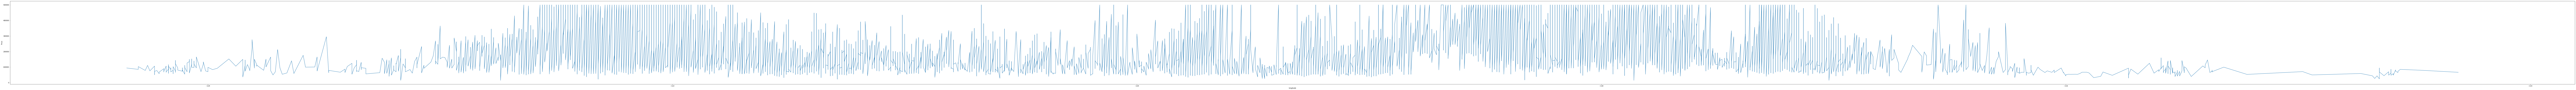

In [0]:
plt.rcParams['figure.figsize'] = [300, 10]
plt.plot(X[X.columns[0]],Y)
plt.xlabel(X.columns[0]);
plt.ylabel('Price');

Designing Model

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


Compiling Model

In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Training Model

In [11]:
history = model.fit(X, Y, epochs=400, batch_size=50,  verbose=1, validation_split=0.2)

Train on 13600 samples, validate on 3400 samples
Epoch 1/400
13600/13600 [==============================] - 2s 150us/sample - loss: 48412433882.3529 - mse: 48412438528.0000 - mae: 190234.8750 - val_loss: 66222307749.6471 - val_mse: 66222301184.0000 - val_mae: 224237.9219
Epoch 2/400
13600/13600 [==============================] - 1s 79us/sample - loss: 32067976304.9412 - mse: 32067981312.0000 - mae: 140906.0938 - val_loss: 39495667320.4706 - val_mse: 39495667712.0000 - val_mae: 158006.8594
Epoch 3/400
13600/13600 [==============================] - 1s 81us/sample - loss: 24883294102.5882 - mse: 24883300352.0000 - mae: 114181.7031 - val_loss: 35638525440.0000 - val_mse: 35638521856.0000 - val_mae: 148000.3125
Epoch 4/400
13600/13600 [==============================] - 1s 80us/sample - loss: 24488141839.0588 - mse: 24488142848.0000 - mae: 112237.4062 - val_loss: 35599627023.0588 - val_mse: 35599622144.0000 - val_mae: 147904.2188
Epoch 5/400
13600/13600 [==============================] - 1s 

In [12]:
model.predict([[-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917]])

array([[160917.16]], dtype=float32)

Visualizing Model

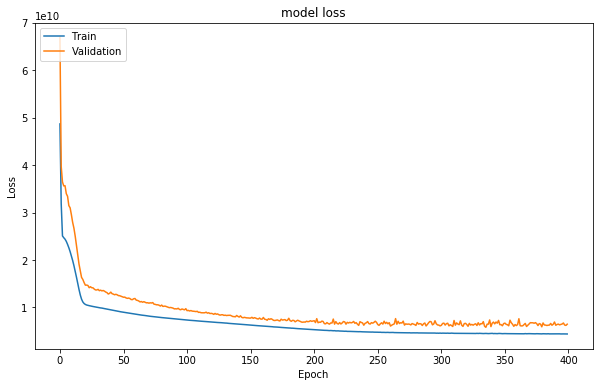

In [0]:
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Saving Model

In [0]:
model.save('housing_regression_model.h5')

Saved Model can be loaded later using:


```
from keras.models import load_model
model=load_model('housing_regression_model.h5')
```



In [0]:
from keras.models import load_model
model=load_model('housing_regression_final.h5')

Seeing JSON of model

In [13]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 8], "dtype": "float32", "units": 12, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense

Testing Dataset

In [0]:
datasetTest = pd.read_csv("sample_data/california_housing_test.csv")
X_test = dataset.iloc[:,:-1]
Y_test = dataset.iloc[:,-1]

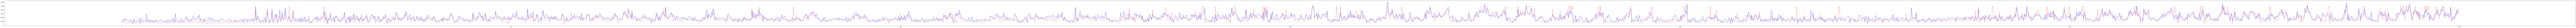

In [0]:
plt.rcParams['figure.figsize'] = [500, 5]

plt.plot(Y_test[0:3000],'--',color='red')
plt.plot(model.predict(X_test[0:3000]),'-',color='blue')
plt.show()


MODEL WEIGHTS

In [0]:
model.weights[3].shape

TensorShape([8])